# Research Paper Midway Point

__Deadline Warrior__: Jitao Zhang, Wanqing Hu, Siying Liu

## 1. Research Summary

This research investigates the impact of diabetes on the health of Californians from 2016 to 2022, focusing on hospitalizations and deaths. It analyzes trends and patterns to understand the burden of diabetes across different counties and complications. The findings aim to inform about the health conditions of Californians and provide insights for better healthcare management.

## 2. Revised Research Questions

### Generial Direction:

We will explore how diabetes has impacted the health of the Californian population from 2016 to 2022, as measured by the number of hospitalizations and deaths.

### Three Pathways:

_Jitao_
- Original Question: The relationship between the number of deaths due to diabetes and the number of hospitalizations due to diabetes in California from 2016 to 2022.
- __Revised Question:__ Is there a relationship between the number of deaths due to diabetes in California with respect to the number of hospitalizations related to diabetes and the at-risk population using data from 2016 to 2022?
- Justification: In my original question, there is essentially one response variable and just one explanatory variable, which may overlook the effects of some lurking or confounding variables, as the TA suggest|ed. Therefore, this time, I chose to add one more variable: the population at risk from all counties in California each year, as a second explanatory variable. However, since there are only seven observations in another dataset after cleaning, and there are no separate records on the number of deaths in each county, we can’t really use `County` as one of our explanatory variables, which is a limitation of this research question.

_Wanqing_
- Original question: The trend of the number of hospitalizations due to diabetes across 2016-2022 for each county in California.
- __Revised Question__: Is there any county that had the highest mean diabetes-related hospitalization rate for more than three years between 2016 and 2022? The hospitalization rate refers to column `ObsRate_ICD10`, which is calculated by $\frac{\text{Count of Hospitalizations}}{\text{Population at risk}} \times 100,000$
- Justification: Our TA initially thought we were trying to solve the problem by creating visualizations. However, our original goal was to build a suitable model (e.g., a time series model). After analyzing the data, we realized that the limited number of time points made it difficult to construct a reliable model. Therefore, we shifted to compare hospitalization rates across counties for each year and investigate whether any county consistently had the highest rate over this period.

_Siying_
- Original question: For diabetes short-term complications and long-term complications, which one is more significant in resulting death in California from 2016 to 2022.
- Revised Question: Among short-term complications, long-term complications, uncontrolled diabetes, and composite diabetes-related conditions, which category is the largest proportion in diabetes-related mortality in California from 2016 to 2022?
- The original question only considers two complication types, but since the research now includes four categories (short/long/uncontrolled/composite), this revised question expands the scope accordingly. And it frames the question in terms of associations rather than significance.

## 3. Data Cleaning 
_(Our detailed data cleaning code and procedure are shown in cleaning/clean.ipynb on Github)_

There are two datasets we will be using throughout our research, and we have cleaned both of them before doing any combinings/joinings.

__Cleaning the first dataset__, `data-table.csv`, is fairly straightforward, since the dataset is already in good shape. The only steps we need to take are:
- Filter out the columns that we definitely won’t need; in this case, it will be `URL`.
- Only keep rows that satisfy our research criteria, meaning the data collected must be from California (`STATE` == 'CA') and obtained between 2016 and 2022 (2016 <= `YEAR` <= 2022).

__Cleaning the second dataset__, `rates-of-preventable-hospitalizations-for-selected-medical-conditions-by-county-.csv`, involves a bit more work. To start, we want to keep only the rows within our study range, which is from 2016 to 2022. Then, we filtered out some irrelevant columns like `Count_ICD9` and `Population_ICD9`, as these variables are based on older criteria before 2016 and contain only empty values after the new criteria were applied. Next, we need to exclude any hospitalization records caused by conditions unrelated to diabetes. In our case, there are only four diabetes-related conditions, so it’s actually quicker to use `isin` to include them, rather than excluding the others. Afterward, by using `info()`, we noticed an anomaly with a non-null value in one of the annotation columns. We looked into that specific observation and realized it was just a period showing in that column, so it wasn’t a major issue. As a second-to-last step, we further filtered out some columns that may not be helpful for our research questions, such as `RiskAdjRate_ICD10` and the annotation columns mentioned above. Finally, we used `shape`, `info()`, and `describe()` to ensure that our cleaned data is indeed in good format.

## 4. EDA

In [52]:
from IPython.display import Image # for display images

### Visualization 1: Number of Death in California Due To Diabetes From 2016 To 2022

- This is the one and only visualization that we will create for our first dataset. It directly shows how the number of deaths due to diabetes changed from 2016 to 2022.
- This plot enables us to identify overall trends in diabetes-related deaths from 2016 to 2022, and we can compare it with hospitalization rates to investigate whether increases or decreases in hospitalizations correspond to changes in death rates.
- We plan to compare diabetes-related hospitalization rates/counts at each time point with corresponding death rates/counts. Our goal is to explore their relationship and potentially build a model to analyze how hospitalization trends impact mortality over time.

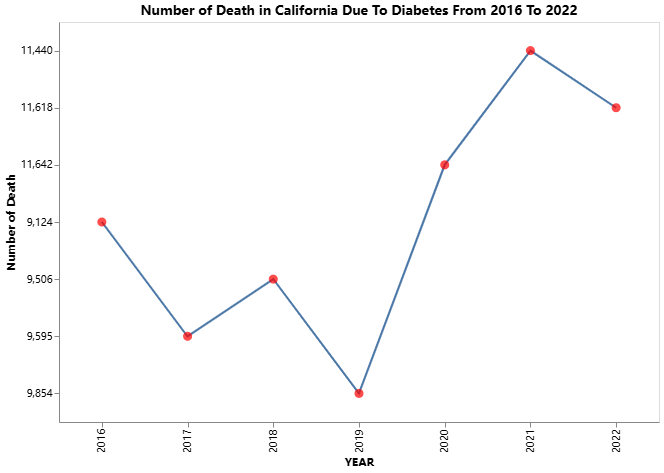

In [56]:
Image(filename="../images/v1.png", width=600)

### Visualization 2: Total Hospitalization Counts in Each County of California Due to Diabetes Conditions From 2016 To 2022

- We create a facet plot for each county in California. Within each subplot, we can see how different types of diabetes conditions contribute to the total number of hospitalizations in that county due to diabetes each year.
- From the plot, we see that some counties have significantly higher hospitalization counts than others, indicating potential regional disparities in diabetes burden and healthcare access. This gives insight into which county might have the highest hospitalization rate for most of the time.
- We will compute the mean hospitalization rates for each county for each year and compare them to identify potential high-burden areas.

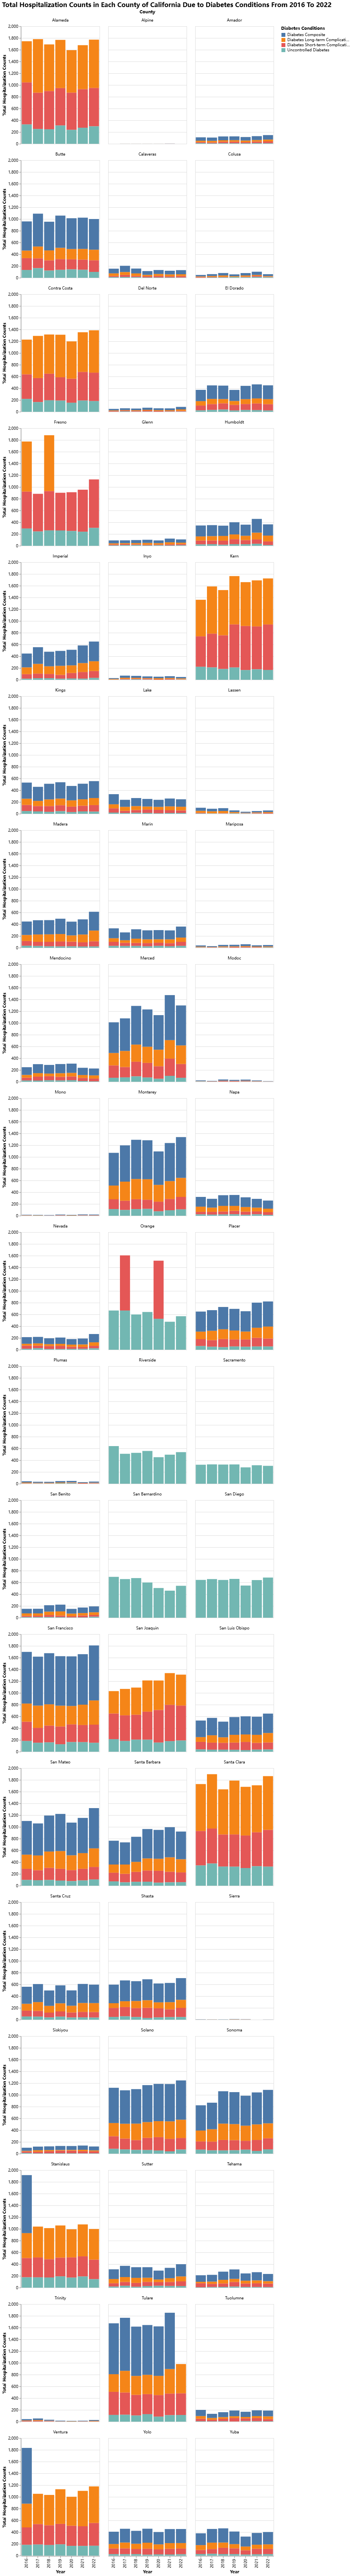

In [64]:
Image(filename="../images/v2.png", width=1000)

## 5. How EDA affects the analysis
EDA helps us better understand the data distribution and identify trends in hospitalization and death rates. Through EDA, we did not encounter missing or inconsistent data, so we do not need to perform transformations or imputations. Instead, we focus on analyzing the hospitalization rates, complications, and mortality without additional preprocessing, so actually EDA process does not affect much on the workflow we are going to carry out with our data.

## 6. SQL Script
We used Python to convert the dataset into text format, then copied and pasted the data into the SQL file as insert statements. We created the 'CREATE TABLE' and 'INSERT' statements to build the database, as shown in the SQL file.

## 7. Schema for the data
CREATE TABLE california (
    
    year int not null,
    state varchar(2) not null check (state = 'CA'),
    rate float not null,
    deaths int not null,
    primary key (year));

Primary Key:
year is the Primary Key. This uniquely identifies each row in the california table.
    

CREATE TABLE counties (

    year int not null,
    county varchar(255) not null,
    PQI int not null,
    PQIDescription varchar(255) not null,
    count_ICD10 int not null,
    population_ICD10 int not null,
    ObsRate_ICD10 FLOAT not null,
    primary key (year, county,PQIDescription),
    foreign key (year) references california(year) on delete cascade);


Primary Key:
(year, county, PQIDescription) is the Primary Key. This combination uniquely identifies each row in the counties table. The primary key is composed of both year, county and PQIDescription columns.

Foreign Keys:
year is a Foreign Key referencing the year column in the california table. This ensures that each record in the counties table corresponds to a valid year in the california table.

ON DELETE CASCADE ensures that when a row in the california table is deleted, all corresponding rows in the counties table are also deleted.